### @GRIPAPR23 - The Spark Foundation
#### Data Science & Business Analytics Intern


### Name : Shaik Naseer Hussain.
#### Task 1: Prediction using Supervised ML
● Predict the percentage of an student based on the no. of study hours.  
● This is a simple linear regression task as it involves just 2 variables.  
● Data can be found at http://bit.ly/w-data 

### About the Dataset.
- We have ony 2 Features given in the Dataset <b>Hours</b> and <b>Scores</b>.
- This Dataset has records in which Hours are related with Scores.
- Means based on Number of hours the student studies the Scores are recorded for them.
- The Scores are on a scale from ` 0 - 100 `  


- The more the student studies the more Score he gets and vice versa.


In [1]:
# Importing required libraries
import numpy as np  #For mathematical calculations
import pandas as pd # For Data Analyses, to load, explore, clean the data.
import matplotlib.pyplot as plt  # For visualizing the data EDA
import seaborn as sns    # Improved version of Matplotlib

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
df = pd.read_csv("Task 1 student_scores.csv")

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Shape of the Dataset.
df.shape

(25, 2)

We have 25 records with 2 Features.

In [4]:
# Info to check for any null values and data type of Features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Describe - to get quantile values, mean, min, max, std, 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From above report we have no Outliers because the data is equally distributed at all quantiles(min, 25%, 50%, 75%, max)

### Performing EDA and visualizing the Data.

<AxesSubplot: >

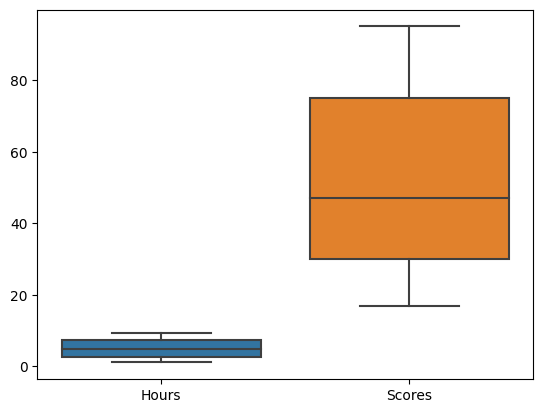

In [6]:
# Boxplot between the 2 Features
sns.boxplot(df)

From above plot we know the distribution of points, Q1,Q3, min, max, median

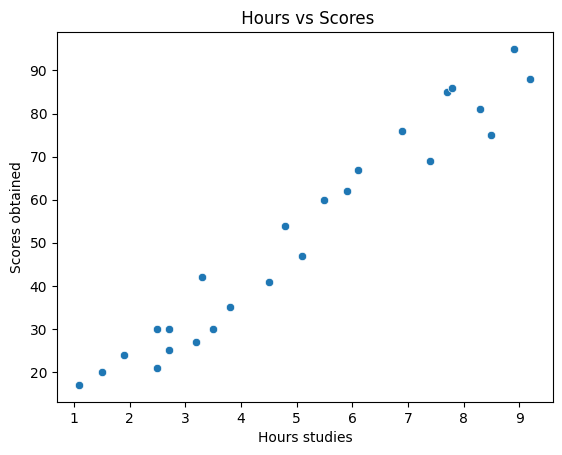

In [7]:
# Scatter plot to check relationship b/w two features visually
sns.scatterplot(df, x = 'Hours', y = 'Scores')
plt.title(" Hours vs Scores")
plt.xlabel("Hours studies")
plt.ylabel("Scores obtained")
plt.show()

From above we clearly see there is a linear relationship between the two which probably suggests us to use Linear Regression.

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


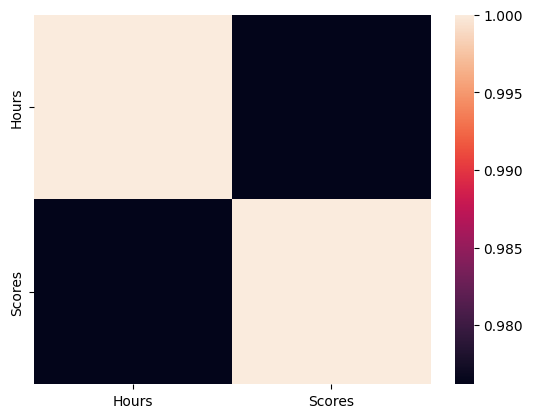

In [8]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

The 2 Features Independent(I/p) and Dependent variables are highly correlated.

Now we are done with EDA, we can now proceed with Model Building.

### Model Building

In [9]:
# Dividing Dataset into X and y features separately.
X = pd.DataFrame(df.iloc[:, 0])
y = pd.DataFrame(df.iloc[:, 1])

#### Splitting Data into Train & Test sets.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Checking shapes of the splits.
print("X_train shape",X_train.shape, "\ny_train shape", y_train.shape, "\nX_test shape",X_test.shape, "\ny_test shape",y_test.shape)

X_train shape (20, 1) 
y_train shape (20, 1) 
X_test shape (5, 1) 
y_test shape (5, 1)


### Training the Simple Linear Regression using Training Data

In [12]:
# Loading LR
from sklearn.linear_model import LinearRegression
# Creating object
slr = LinearRegression()

In [13]:
# Fitting the Training Data.
slr.fit(X_train, y_train)

LinearRegression()

In [14]:
# Printing the Intercept('c') and Coefficient('m') in the regression line y = mx + c
print("Intercept : ",slr.intercept_, '\nCoefficient',slr.coef_)

Intercept :  [2.01816004] 
Coefficient [[9.91065648]]


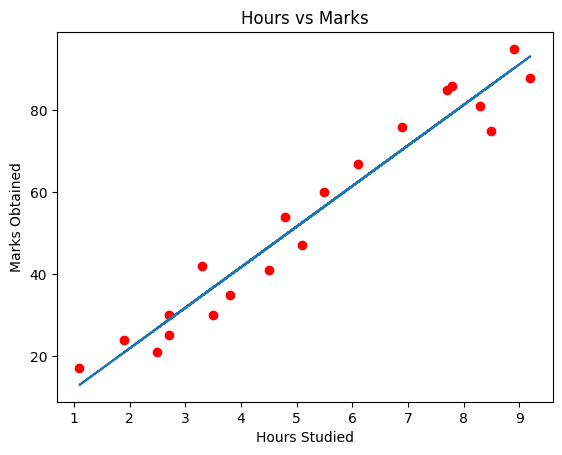

In [15]:
# Now plotting a plot between Fitting Regression line of SLR and the Traning Dataset.
y_pred = slr.coef_*X_train + slr.intercept_

# Plotting Regression LIne
plt.plot(X_train,y_pred)

# Plotting Datapoints using Scatterplotplot
plt.scatter(X_train,y_train,marker='o',color="red")

plt.title("Hours vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.show()

Now the model is good on training set, but we need to check the same for test set as well.

In [16]:
# Predicting y_test from Trained Model
y_test_pred = slr.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred)

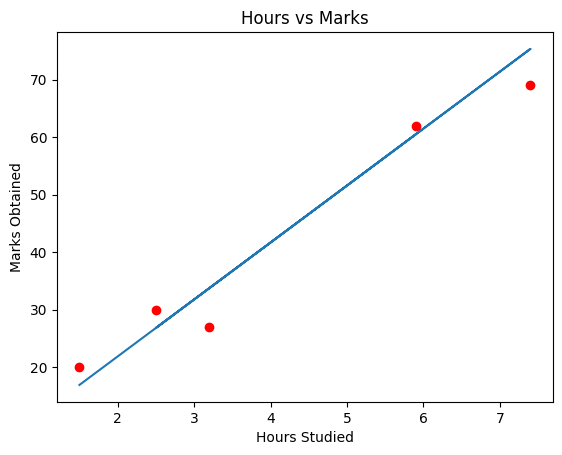

In [17]:
# Now plotting a plot between predicted Test set and Actual Test set.

# Plotting Regression LIne
plt.plot(X_test,y_test_pred)

# Plotting Datapoints using Scatterplotplot
plt.scatter(X_test,y_test,marker='o',color="red")

plt.title("Hours vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.show()

- Now we have done with Model Building and Evaluating on Test Set.
- Now we need to check the Metrics.

### Evaluating Metrics

In [18]:
from sklearn.metrics import r2_score

In [19]:
print("R_square of the model for Train", r2_score(y_train,y_pred))
print("R_square of the model Test", r2_score(y_test,y_test_pred))

R_square of the model for Train 0.9515510725211552
R_square of the model Test 0.9454906892105355


The near the value of R^2 score to 1 the better the model is.

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error for Train",mean_absolute_error(y_train,y_pred),
    "\nMean Squared Error for Train", mean_squared_error(y_train,y_pred))

print("\n\nMean Absolute Error for Test",mean_absolute_error(y_test,y_test_pred),
      "\nMean Squared Error for Test", mean_squared_error(y_test,y_test_pred))

Mean Absolute Error for Train 5.186601709180371 
Mean Squared Error for Train 30.89818237731452


Mean Absolute Error for Test 4.183859899002975 
Mean Squared Error for Test 21.598769307217406


### The score given by our Model for Train and Test

In [21]:
print("Train : ",slr.score(X_train,y_train)*100)
print("Test : ",slr.score(X_test,y_test)*100)

Train :  95.15510725211553
Test :  94.54906892105355


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
# We are now testing our model new input datapoint that model has never seen before
Hours = np.array([[9.25]])
pred_op = slr.predict(Hours)
print("Given Hours are : ",Hours,"\nThe Predicted Score : ",pred_op[0])

Given Hours are :  [[9.25]] 
The Predicted Score :  [93.69173249]
